In [1]:
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
# fix n, sigma^{2}_{T} and sigma^{2}_{T'}; change c, m and let color denote whether
# or not generalization error is smaller for multi-task learning algo

def gen_error_diff(n, m, var1, var2, c):
    single_task_ge = var1 / 2*n
    multi_task_ge = (m*c)**2 / (n + m)
    multi_task_ge += (n*var1 + m*var2) / (2*n + 2*m)
    
    return single_task_ge / multi_task_ge

In [19]:
var1 = 4
var2 = 9
n = 5

m = np.linspace(1, 80, 80)
c = np.arange(0, 4, step = 5 / 80)
v2 = np.arange(1, 10, step = 10 / 80)
bias_x, bias_y = np.meshgrid(m, c)
var_x, var_y = np.meshgrid(m, v2)

bias_func = lambda i, j: gen_error_diff(n, i, var1, var2, j)
bias_func2 = lambda i, j: gen_error_diff(n, i, var2, var1, j)
var_func = lambda i, j: gen_error_diff(n, i, var1, j, 0.5)

bias_mat = bias_func(bias_x, bias_y)
bias_mat2 = bias_func2(bias_x, bias_y)
var_mat = var_func(var_x, var_y)

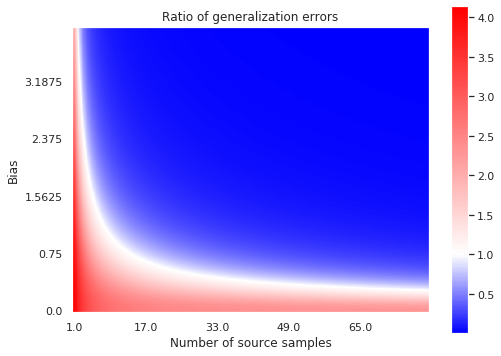

In [23]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

import matplotlib.colors as colors
divnorm = colors.DivergingNorm(vcenter=1)

pos = ax.imshow(bias_mat, cmap='bwr', origin ='lower', interpolation='bilinear', norm=divnorm)
fig.colorbar(pos)
ax.set_ylabel('Bias')
ax.set_xlabel('Number of source samples')
ax.set_title('Ratio of generalization errors')
plt.grid(False)
plt.xticks([len(m)*i/5 for i in range(5)], [m[int(len(m)*i/5)] for i in range(5)])
plt.yticks([len(c)*i/5 for i in range(5)], [c[int(len(c)*i/5)] for i in range(5)])

plt.savefig('phase_diagram_bias_source_variance_small.pdf')

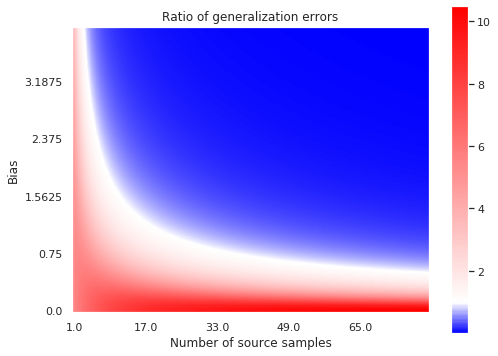

In [25]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

import matplotlib.colors as colors
divnorm = colors.DivergingNorm(vcenter=1)

pos = ax.imshow(bias_mat2, cmap='bwr', origin ='lower', interpolation='bilinear', norm=divnorm)
fig.colorbar(pos)
ax.set_ylabel('Bias')
ax.set_xlabel('Number of source samples')
ax.set_title('Ratio of generalization errors')
plt.grid(False)
plt.xticks([len(m)*i/5 for i in range(5)], [m[int(len(m)*i/5)] for i in range(5)])
plt.yticks([len(c)*i/5 for i in range(5)], [c[int(len(c)*i/5)] for i in range(5)])

plt.savefig('phase_diagram_bias_target_variance_small.pdf')

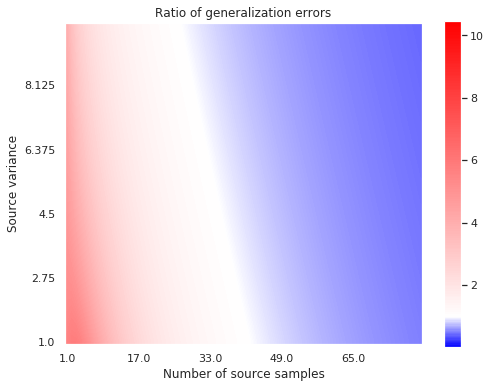

In [26]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

pos = ax.imshow(var_mat, cmap='bwr', origin ='lower', interpolation='bilinear', norm=divnorm)
fig.colorbar(pos)
ax.set_ylabel('Source variance')
ax.set_xlabel('Number of source samples')
ax.set_title('Ratio of generalization errors')
plt.grid(False)
plt.xticks([len(m)*i/5 for i in range(5)], [m[int(len(m)*i/5)] for i in range(5)])
plt.yticks([len(v2)*i/5 for i in range(5)], [v2[int(len(v2)*i/5)] for i in range(5)])

plt.savefig('phase_diagram_variance_bias05.pdf')